In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('survey lung cancerSy.csv')

In [3]:
data.head()

,GENDER,AGE,SMOKING,FATIGUE,ALCOHOL CONSUMING,COUGHING,LUNG_CANCER
0,M,69,1,1,1,1,1
1,M,74,1,1,1,0,1
2,F,59,0,1,0,1,0
3,M,63,1,0,1,0,0
4,F,63,0,0,0,1,0


In [4]:
def analyseDataSet(data):
    print(data.shape)
    print(data.info)
    print(data.head())
    print(data.describe().transpose())
    
analyseDataSet(data)

(2999, 7)
<bound method DataFrame.info of      GENDER  AGE  SMOKING  FATIGUE   ALCOHOL CONSUMING  COUGHING  LUNG_CANCER
0         M   69        1         1                  1         1            1
1         M   74        1         1                  1         0            1
2         F   59        0         1                  0         1            0
3         M   63        1         0                  1         0            0
4         F   63        0         0                  0         1            0
...     ...  ...      ...       ...                ...       ...          ...
2994      F   55        1         1                  0         1            1
2995      F   64        0         1                  0         0            0
2996      F   52        1         1                  0         0            1
2997      F   63        0         0                  0         1            1
2998      F   65        1         1                  0         0            1

[2999 rows x 7 column

In [5]:
data.corr()['LUNG_CANCER']

AGE                  0.365373
SMOKING              0.558192
FATIGUE              0.173030
ALCOHOL CONSUMING    0.325972
COUGHING             0.268166
LUNG_CANCER          1.000000
Name: LUNG_CANCER, dtype: float64

In [6]:
data.shape

(2999, 7)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Data cleaning

In [8]:
# null values
data.isnull().sum()

GENDER               0
AGE                  0
SMOKING              0
FATIGUE              0
ALCOHOL CONSUMING    0
COUGHING             0
LUNG_CANCER          0
dtype: int64

In [9]:
data = data.dropna()

# Data visualization

In [10]:
import matplotlib.pyplot as plt

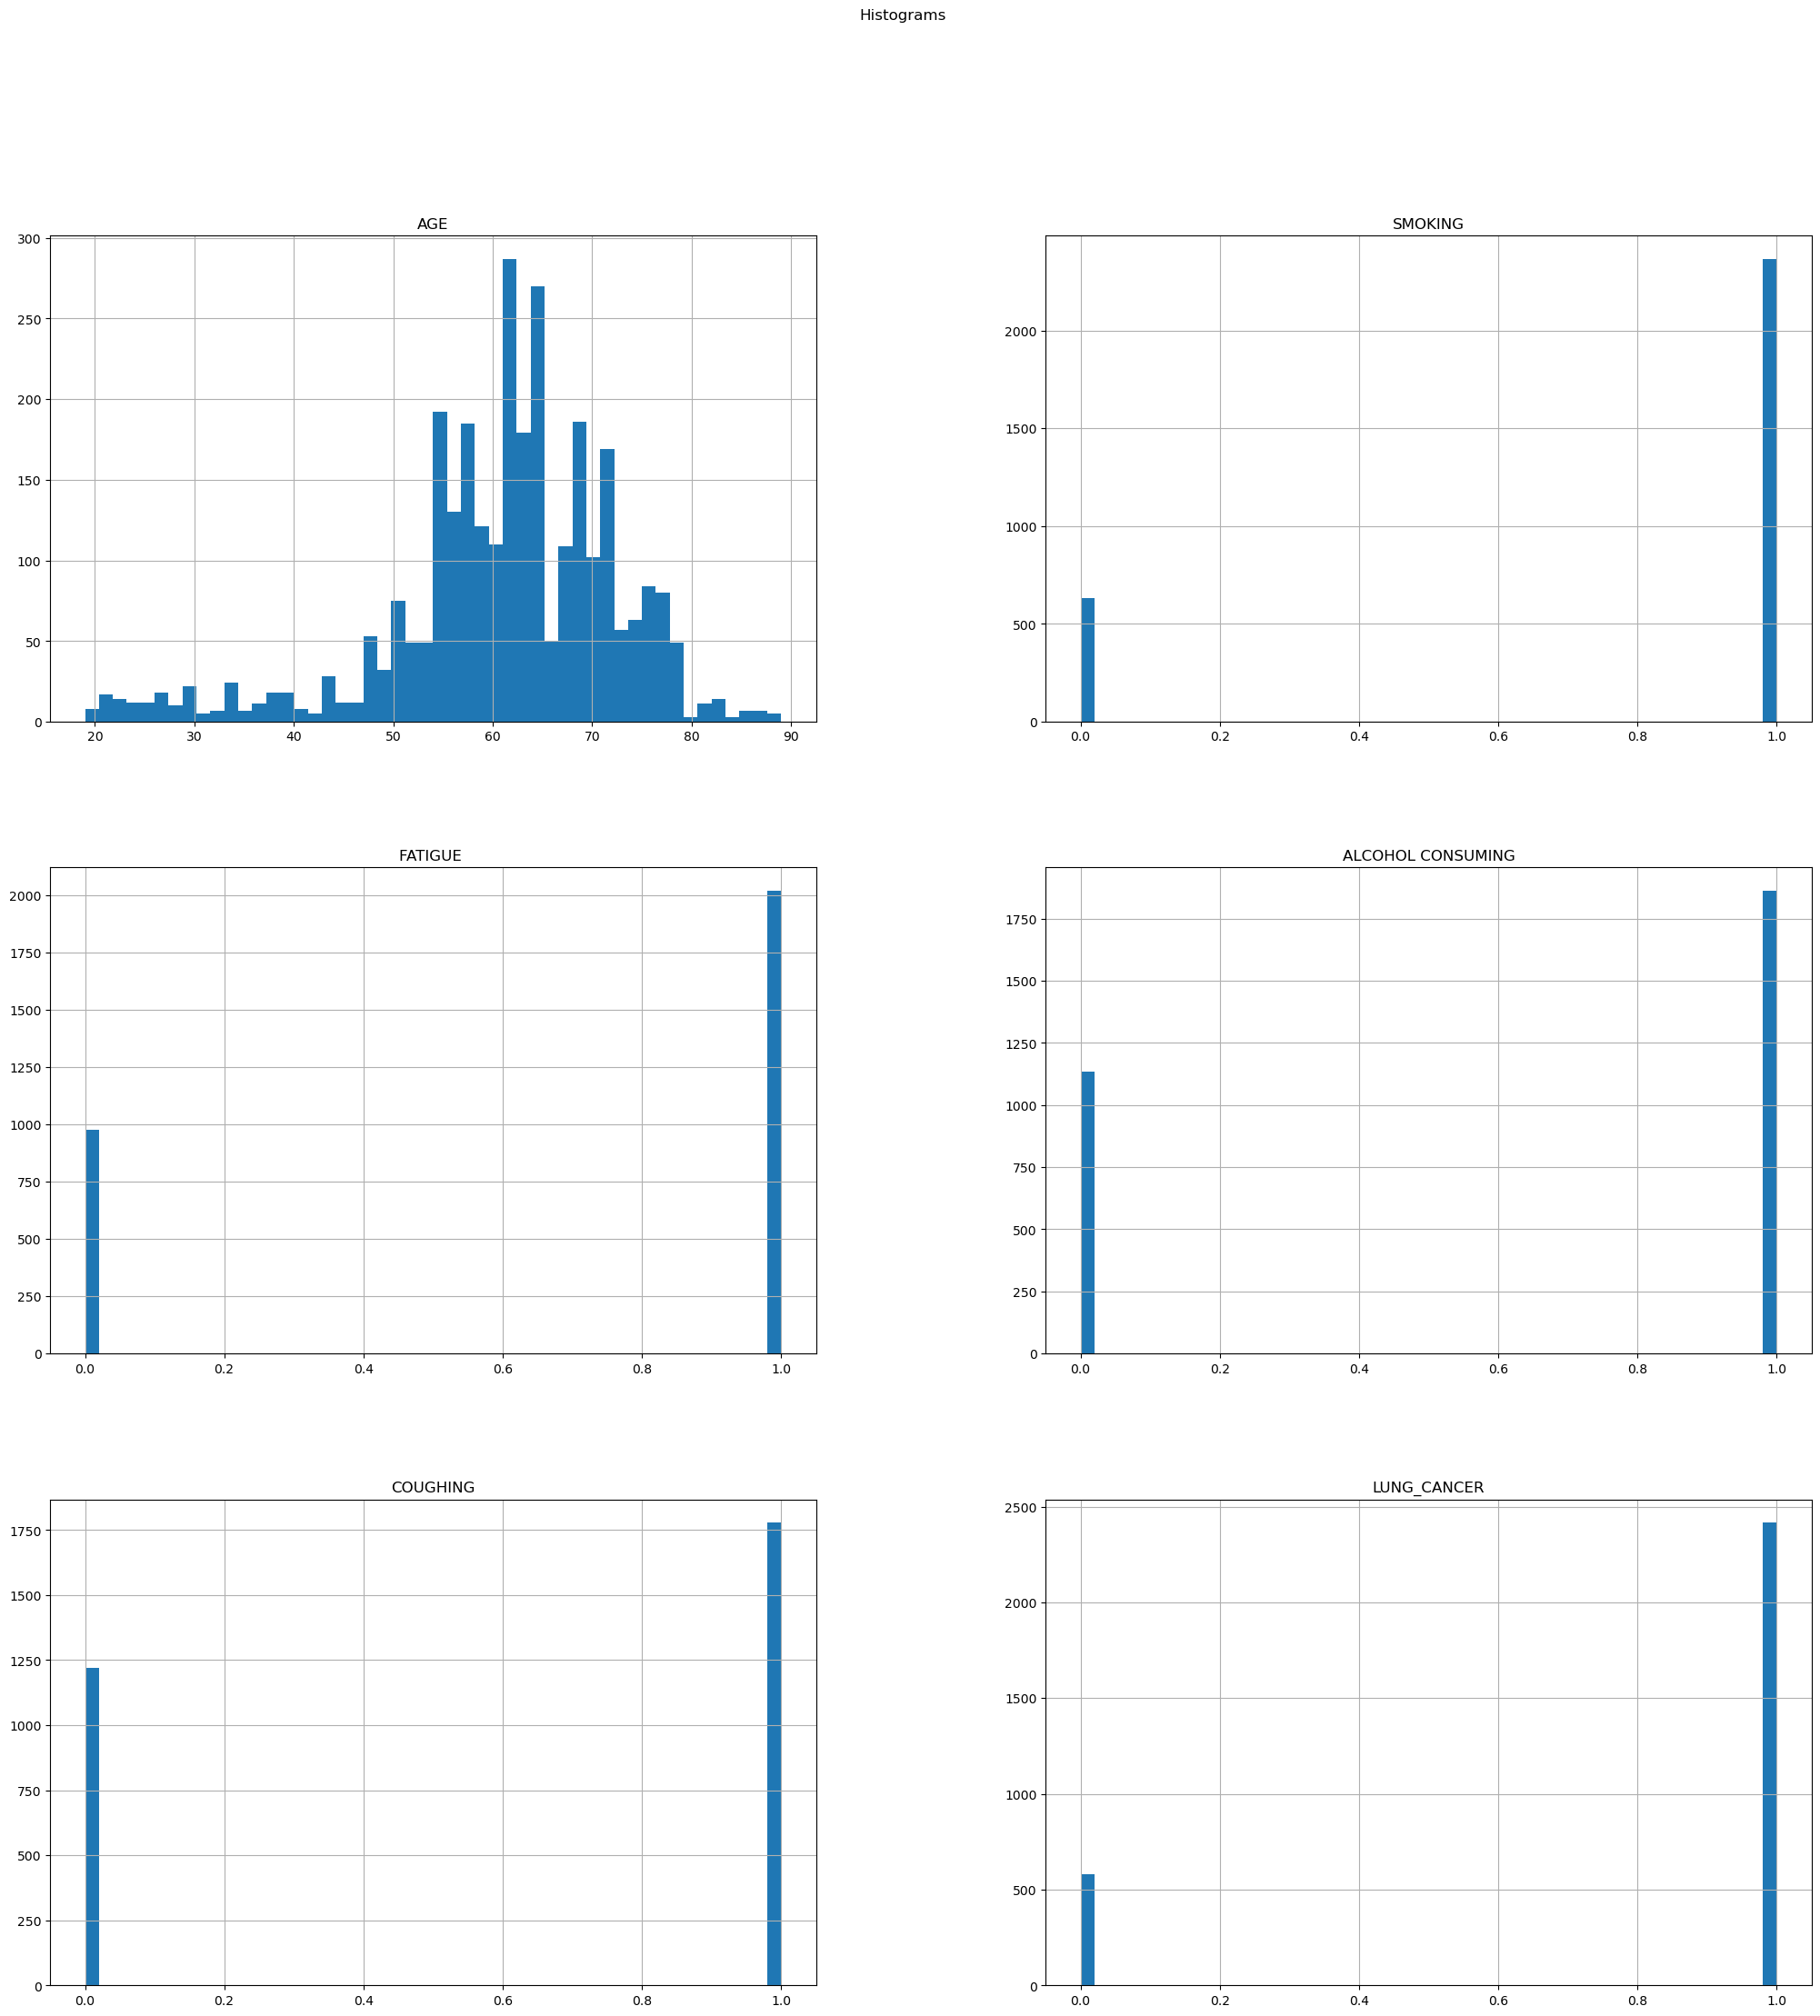

In [11]:
def data_visualize(data):
    data.hist(bins=50, figsize=(25,25))
    plt.suptitle("Histograms")
    plt.show()
data_visualize(data)

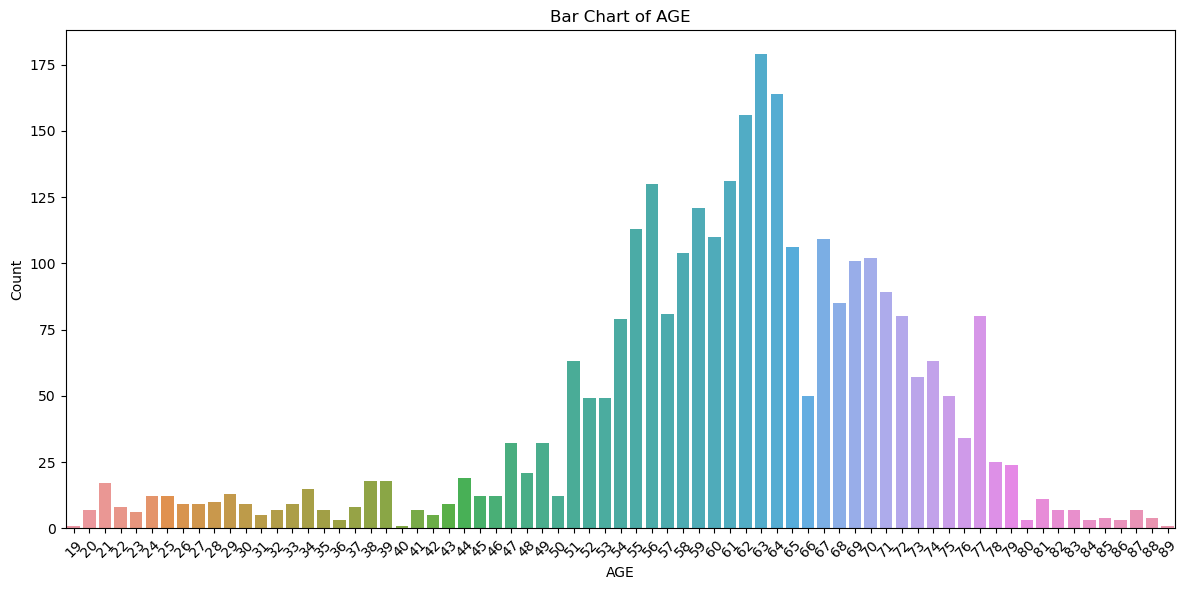

In [12]:
import seaborn as sns

    
def plot_bar_chart(data, column_name):
    plt.figure(figsize=(12, 6))# Adjust the figure size for wider x-axis
    sns.countplot(x=column_name, data=data)
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.title(f'Bar Chart of {column_name}')
    plt.xticks(rotation=45) # Rotate x-axis labels for readability
    plt.tight_layout() # Ensure labels fit within the figure
    plt.show()

# Example usage:
plot_bar_chart(data, 'AGE')




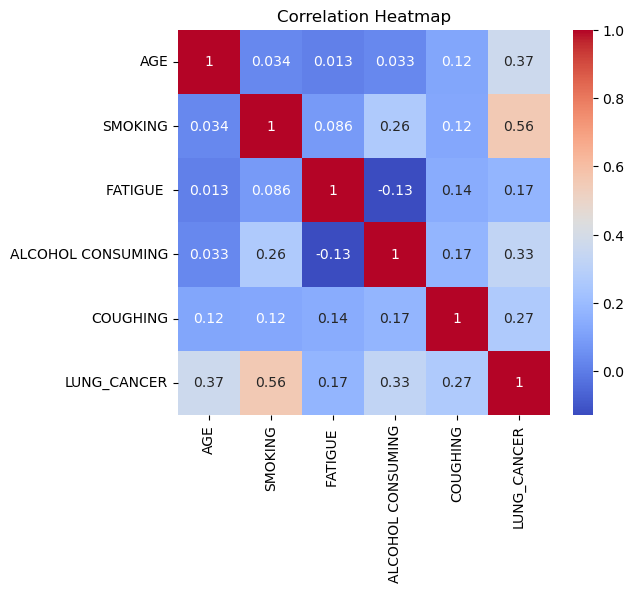

In [13]:
def plot_correlation_heatmap(data):
    correlation_matrix = data.corr()
    plt.figure(figsize=(6, 5))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage:
plot_correlation_heatmap(data)

In [14]:
data.describe()

,AGE,SMOKING,FATIGUE,ALCOHOL CONSUMING,COUGHING,LUNG_CANCER
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,60.796265,0.788930,0.673891,0.621207,0.593198,0.805935
std,11.732545,0.408136,0.468866,0.485167,0.491319,0.395545
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
data['LUNG_CANCER'].value_counts()

1    2417
0     582
Name: LUNG_CANCER, dtype: int64

# one hot encoding

In [16]:
data = pd.get_dummies(data)

In [17]:
data.head()

,AGE,SMOKING,FATIGUE,ALCOHOL CONSUMING,COUGHING,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,1,1,1,1,0,1
1,74,1,1,1,0,1,0,1
2,59,0,1,0,1,0,1,0
3,63,1,0,1,0,0,0,1
4,63,0,0,0,1,0,1,0


In [18]:
data.corr()['LUNG_CANCER']

AGE                  0.365373
SMOKING              0.558192
FATIGUE              0.173030
ALCOHOL CONSUMING    0.325972
COUGHING             0.268166
LUNG_CANCER          1.000000
GENDER_F            -0.071207
GENDER_M             0.071207
Name: LUNG_CANCER, dtype: float64

# Model building and selections

In [19]:
pip install scikit-learn==1.3.1

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [21]:
def evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test):

    accuracies = {}
    
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[name] = accuracy
    
    return accuracies

In [22]:
X = data.drop(columns=['LUNG_CANCER'])
y = data['LUNG_CANCER']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
    
}

In [25]:
# Call the function to get accuracies
accuracies = evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test)

G:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
# Print the accuracies
for name, accuracy in accuracies.items():
    print(f"{name} Accuracy: {accuracy}")

Random Forest Accuracy: 0.9333333333333333
SVM Accuracy: 0.8533333333333334
Logistic Regression Accuracy: 0.9283333333333333
Decision Tree Accuracy: 0.9266666666666666
Naive Bayes Accuracy: 0.9016666666666666


# Hyperparameter tuning 

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],  # Remove 'auto'
    'bootstrap': [True, False]
}


In [29]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,  # 5-fold cross-validation
                           n_jobs=-1,  # Use all available CPU cores
                           verbose=2)  # Print progress


In [30]:
# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30, 40],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10, 15],
                         'n_estimators': [100, 200, 300, 400]},
             verbose=2)

In [31]:
# Get the best Random Forest classifier and its accuracy
best_rf_classifier = grid_search.best_estimator_
best_rf_predictions = best_rf_classifier.predict(X_test)
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)

accuracy = accuracy_score(y_test, best_rf_predictions)
report = classification_report(y_test, best_rf_predictions)

print("Best Random Forest Accuracy:", best_rf_accuracy)
print("Best Random Forest Parameters:", grid_search.best_params_)
print("Classification Report:\n", report)

Best Random Forest Accuracy: 0.9466666666666667
Best Random Forest Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       106
           1       0.97      0.97      0.97       494

    accuracy                           0.95       600
   macro avg       0.91      0.90      0.91       600
weighted avg       0.95      0.95      0.95       600



In [32]:
best_rf_classifier.score(X_test,y_test)

0.9466666666666667

In [33]:
import pickle
with open('LungCancerPredictorMF.pickle','wb') as file:
    pickle.dump(best_rf_classifier,file)


In [34]:
X_train.columns

Index(['AGE', 'SMOKING', 'FATIGUE ', 'ALCOHOL CONSUMING', 'COUGHING',
       'GENDER_F', 'GENDER_M'],
      dtype='object')

In [35]:
best_rf_classifier.predict([[20,0,1,0,1,0,1]])

G:\Anaconda\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [36]:
import sklearn
print(sklearn.__version__)


1.3.1


In [37]:
pip show numpy

Name: numpy
Version: 1.21.5
Summary: NumPy is the fundamental package for array computing with Python.
Home-page: https://www.numpy.org
Author: Travis E. Oliphant et al.
Author-email: 
License: BSD
Location: g:\anaconda\lib\site-packages
Requires: 
Required-by: altair, astropy, bkcharts, bokeh, Bottleneck, daal4py, datashader, datashape, gensim, h5py, holoviews, hvplot, imagecodecs, imageio, librosa, matplotlib, mkl-fft, mkl-random, numba, numexpr, pandas, patsy, pyarrow, pydeck, pyerfa, PyWavelets, resampy, scikit-image, scikit-learn, scipy, seaborn, statsmodels, streamlit, tables, tifffile, xarray
Note: you may need to restart the kernel to use updated packages.
